In [29]:
import os.path 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from statistics import pstdev
from scipy.fft import fftshift, ifft, fftfreq
import numpy as np
from scipy.signal.windows import tukey
import math
from scipy.interpolate import interp1d
from time import time as time
from time import strftime
from datetime import date
from scipy.signal import ShortTimeFFT
from scipy.signal import find_peaks, peak_widths
from scipy.stats import norm
from IPython.display import display, Latex
import re 
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import hilbert
from matplotlib.patches import Rectangle
from scipy.signal import savgol_filter

import lmfit

from scipy.signal.windows import tukey

plt.rcParams.update({'font.size':13})

In [30]:
file_800 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/160126/power_series_rh110_800.txt'
loaded_file_800 = np.loadtxt(file_800,usecols =[1,2,3,5,6,7,8,9,10,11,12,13,14])

GDD_800 = loaded_file_800[:,0]
temporal_width_800 = loaded_file_800[:,1]
power_800 = loaded_file_800[:,3]
cpm_800 = loaded_file_800[:,12]

log_cpm_800 = np.log10(cpm_800)
log_power_800 = np.log10(power_800)


power_800_square = power_800**2


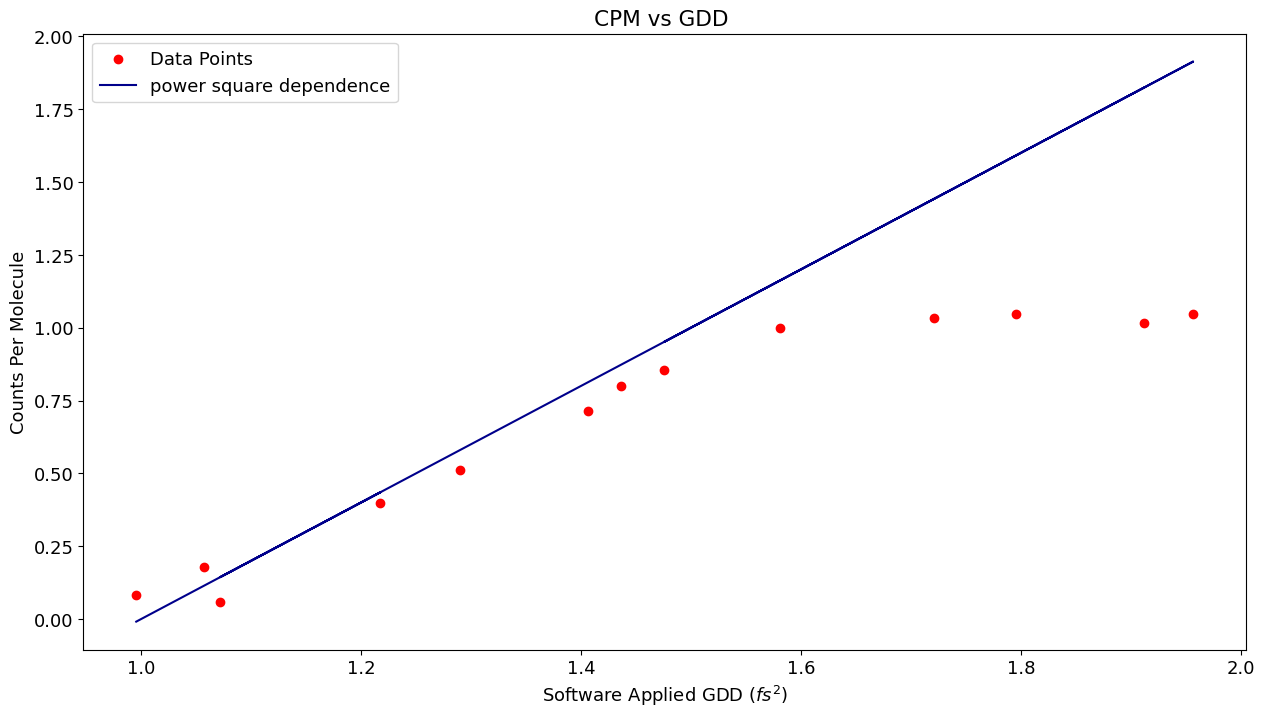

In [31]:
plt.figure(figsize=(15,8))
plt.scatter(log_power_800, log_cpm_800, color ='red', label = 'Data Points')
plt.plot(log_power_800, np.log10(power_800_square)-2,color ='darkblue', label = 'power square dependence')
plt.xlabel("Software Applied GDD ($fs^2$)")
plt.ylabel("Counts Per Molecule")
plt.title("CPM vs GDD ")
plt.legend()
plt.show()


In [32]:
file_400 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/160126/power_series_rh110_400.txt'
loaded_file_400 = np.loadtxt(file_400,usecols =[1,2,3,5,6,7,8,9,10,11,12,13,14])

GDD_400 = loaded_file_400[:,0]
temporal_width_400 = loaded_file_400[:,1]
power_400 = loaded_file_400[:,3]
cpm_400 = loaded_file_400[:,12]

log_cpm_400 = np.log10(cpm_400)
log_power_400 = np.log10(power_400)

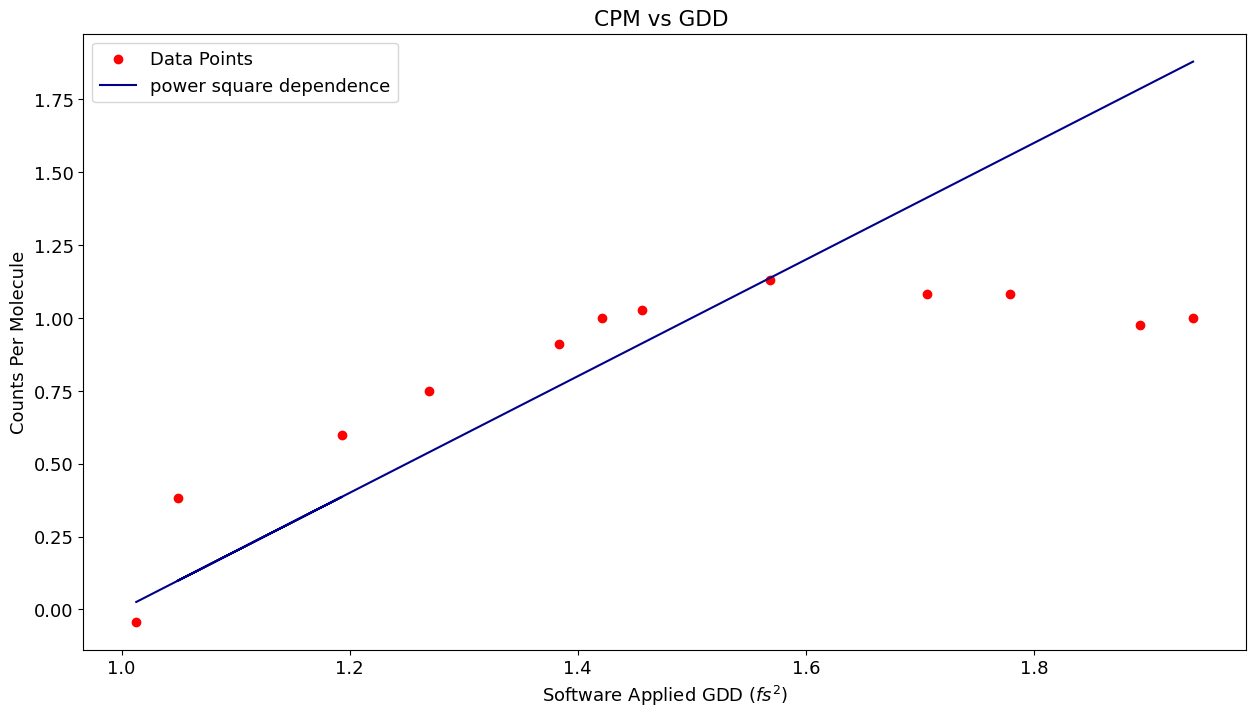

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(log_power_400, log_cpm_400, color ='red', label = 'Data Points')
plt.plot(log_power_400, np.log10(power_400**2)-2,color ='darkblue', label = 'power square dependence')
plt.xlabel("Software Applied GDD ($fs^2$)")
plt.ylabel("Counts Per Molecule")
plt.title("CPM vs GDD ")
plt.legend()
plt.show()


In [34]:
file_0 = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/160126/power_series_rh110_0.txt'
save_folder = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/160126/'
loaded_file_0 = np.loadtxt(file_0,usecols =[1,2,3,5,6,7,8,9,10,11,12,13,14])

GDD_0 = loaded_file_0[:,0]
temporal_width_0 = loaded_file_0[:,1]
power_0 = loaded_file_0[:,3]
cpm_0 = loaded_file_0[:,12]

log_cpm_0 = np.log10(cpm_0)
log_power_0 = np.log10(power_0)

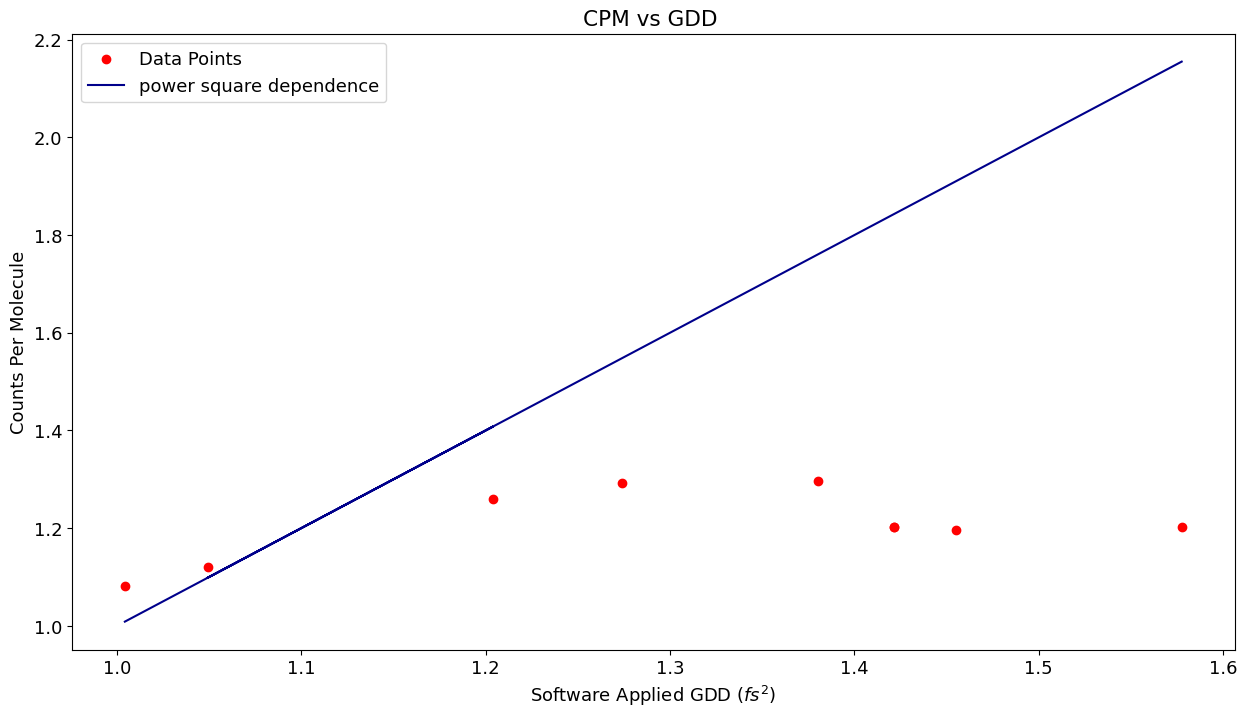

In [35]:
plt.figure(figsize=(15,8))
plt.scatter(log_power_0, log_cpm_0, color ='red', label = 'Data Points')
plt.plot(log_power_0, np.log10(power_0**2)-1,color ='darkblue', label = 'power square dependence')
plt.xlabel("Software Applied GDD ($fs^2$)")
plt.ylabel("Counts Per Molecule")
plt.title("CPM vs GDD ")
plt.legend()
plt.show()

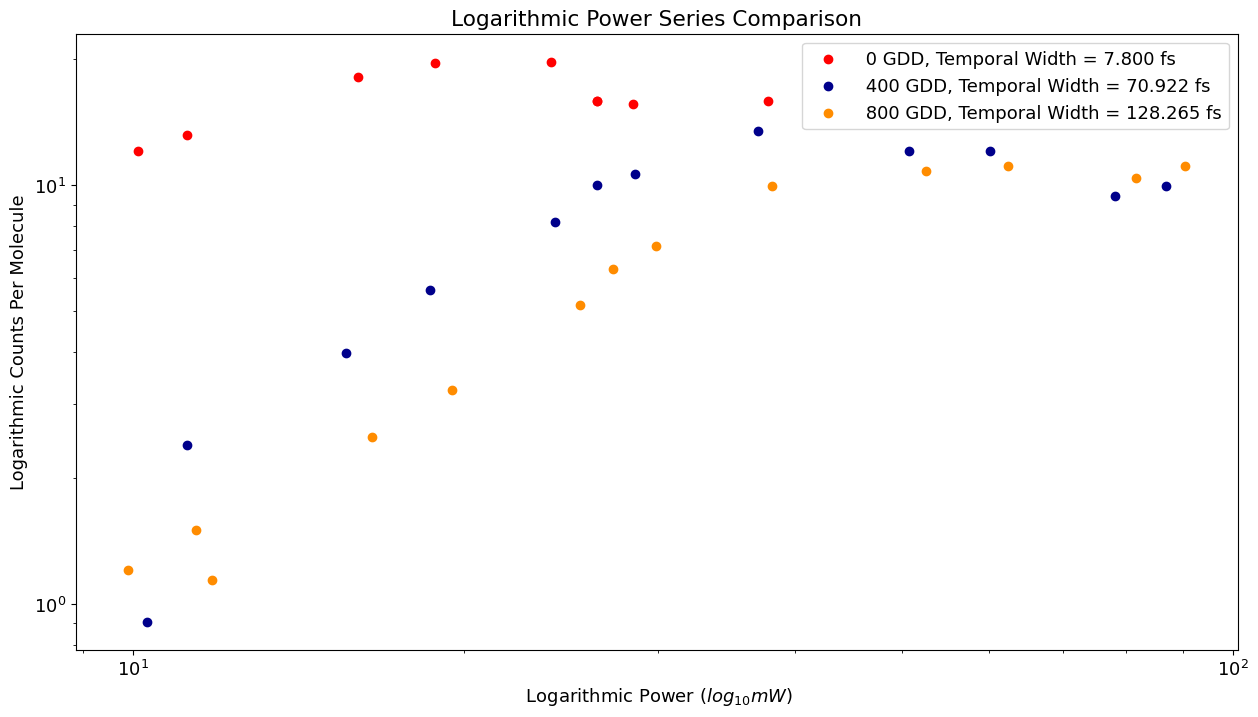

In [36]:
plt.figure(figsize=(15,8))
plt.xscale('log')
plt.yscale('log')
plt.scatter(power_0, cpm_0, color ='red', label = ' 0 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_0)))
plt.scatter(power_400, cpm_400, color ='darkblue', label = ' 400 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_400)))
plt.scatter(power_800, cpm_800, color ='darkorange', label = ' 800 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_800)))
#plt.plot(log_power_400, np.log10(power_400**2)-2,color ='magenta', label = 'power square dependence')
plt.xlabel(" Logarithmic Power ($log_{10} mW$)")
plt.ylabel("Logarithmic Counts Per Molecule")
plt.title("Logarithmic Power Series Comparison")
title = 'log_power_series_comp'+(date.today()).strftime("_%d_%m_%y")+'.png'
save_folder =os.path.join(save_folder,title)
plt.legend()
#plt.savefig(save_folder)
plt.show()

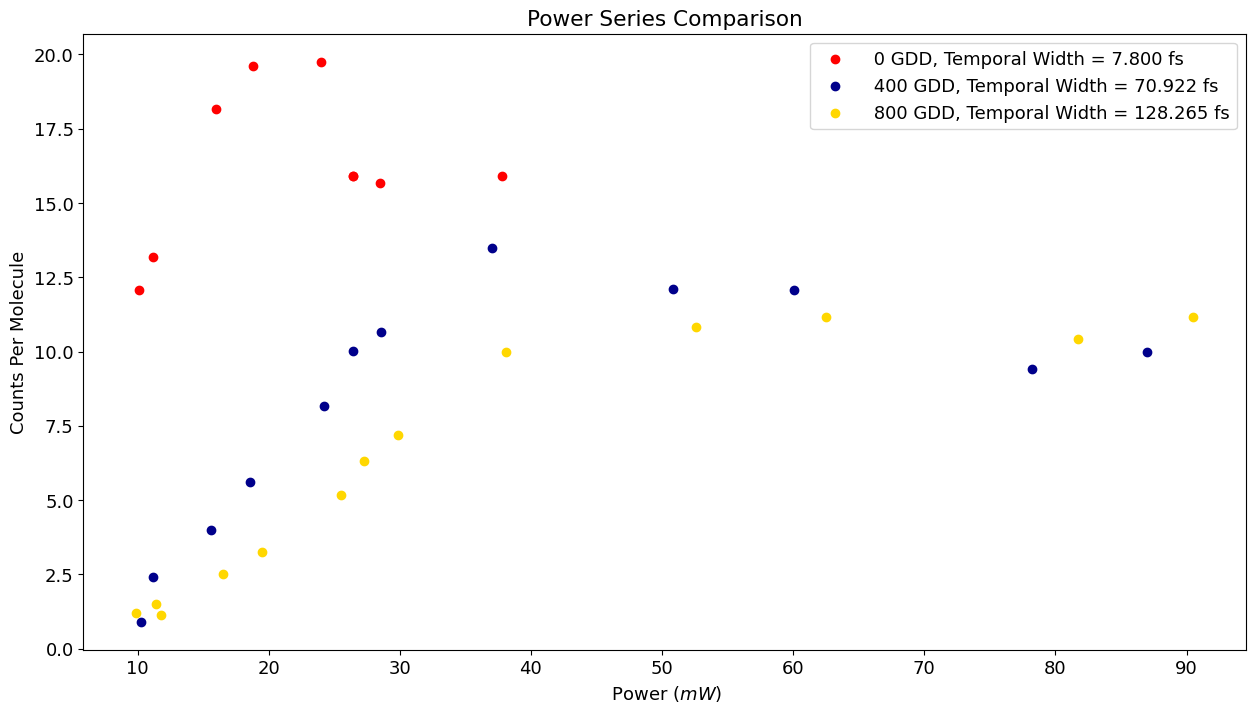

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(power_0, cpm_0, color ='red', label = ' 0 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_0)))
plt.scatter(power_400, cpm_400, color ='darkblue', label = ' 400 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_400)))
plt.scatter(power_800, cpm_800, color ='gold', label = ' 800 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_800)))
#plt.plot(power_800, power_800_square,color ='magenta', label = 'power square dependence')
plt.xlabel(" Power ($ mW$)")
plt.ylabel("Counts Per Molecule")
plt.title("Power Series Comparison")
plt.legend()
plt.savefig('prelim_power_series_graph.png')
plt.show()

In [71]:
file_water= r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/290126/power_series_rh110_0_water.txt'
save_folder = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/290126/'
loaded_file_water = np.loadtxt(file_water,usecols =[1,2,3,5,6,7,8,9,10,11,12,13,14])

GDD_water = loaded_file_water[:,0]
temporal_width_water = loaded_file_water[:,1]
power_water = loaded_file_water[:,3]
cpm_water = loaded_file_water[:,12]

log_cpm_water = np.log10(cpm_water)
log_power_water = np.log10(power_water)

file_buffer = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/290126/power_series_rh110_0_buffer.txt'
save_folder = r'/Users/craigpaterson/Library/CloudStorage/OneDrive-UniversityofGlasgow/5th Year/Project Data/290126/'
loaded_file_buffer = np.loadtxt(file_buffer,usecols =[1,2,3,5,6,7,8,9,10,11,12,13,14])

GDD_buffer = loaded_file_buffer[:,0]
temporal_width_buffer = loaded_file_buffer[:,1]
power_buffer = loaded_file_buffer[:,3]
cpm_buffer = loaded_file_buffer[:,12]

log_cpm_buffer = np.log10(cpm_buffer)
log_power_buffer = np.log10(power_buffer)

/var/folders/ch/jpgfqsp91mq7dcm3hcx5l0vc0000gn/T/ipykernel_1498/1372508872.py:22: RuntimeWarning: divide by zero encountered in log10
  log_cpm_buffer = np.log10(cpm_buffer)


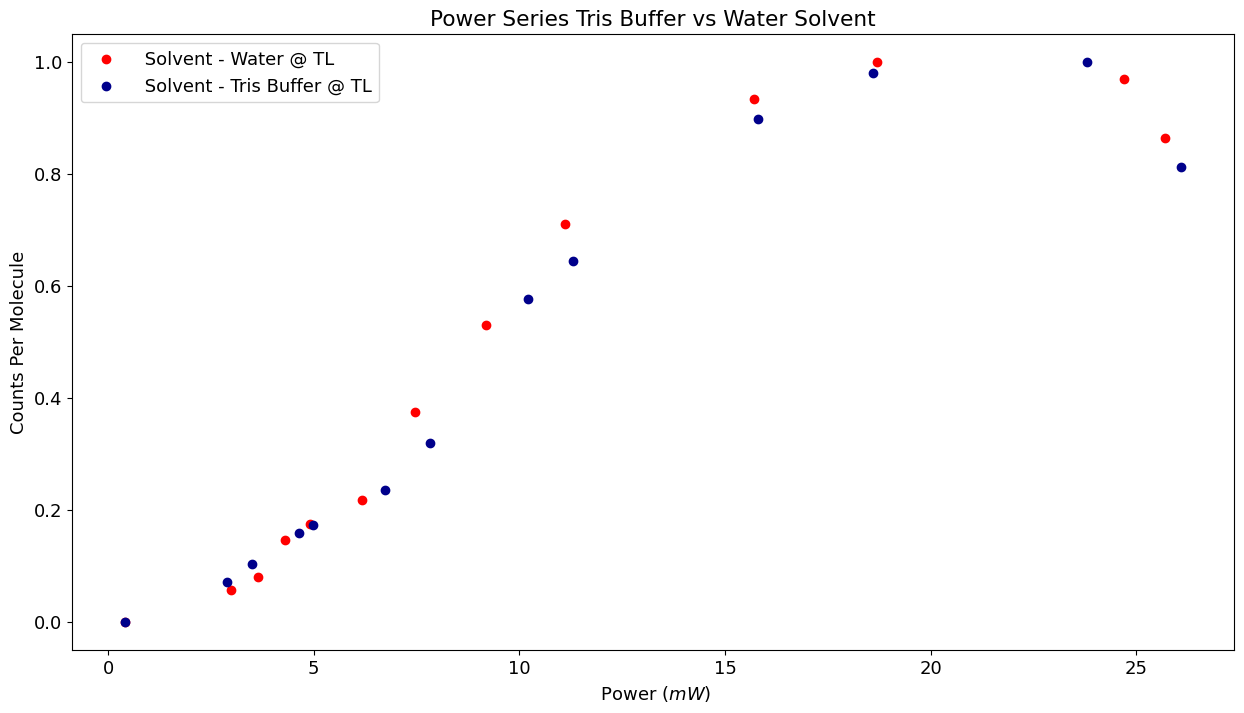

In [72]:


plt.figure(figsize=(15,8))
plt.scatter(power_water, cpm_water/np.max(cpm_water), color ='red', label = ' Solvent - Water @ TL')
plt.scatter(power_buffer, cpm_buffer/np.max(cpm_buffer), color ='darkblue', label = ' Solvent - Tris Buffer @ TL')
#plt.scatter(power_800, cpm_800, color ='gold', label = ' 800 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_800)))
#plt.plot(power_800, power_800_square,color ='magenta', label = 'power square dependence')
plt.xlabel(" Power ($ mW$)")
plt.ylabel("Counts Per Molecule")
plt.title("Power Series Tris Buffer vs Water Solvent")
plt.legend()
plt.savefig('power_series_buffer.png')
plt.show()

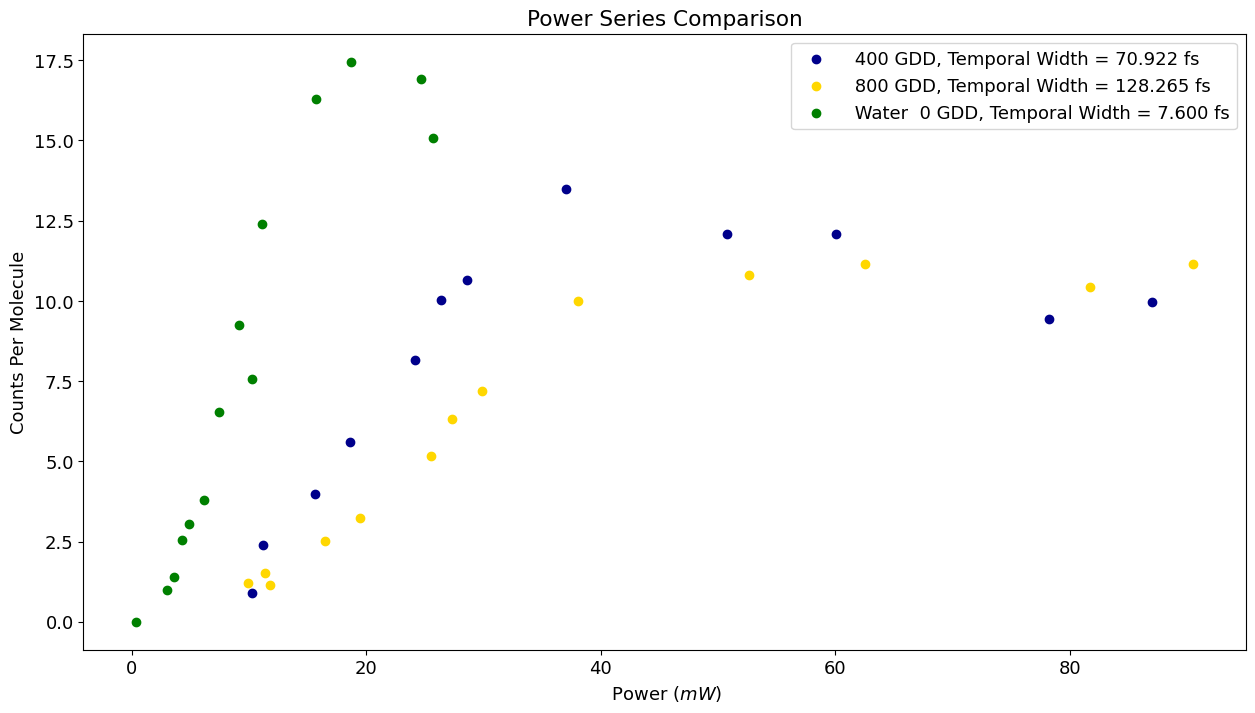

In [40]:
plt.figure(figsize=(15,8))
#plt.scatter(power_0, cpm_0, color ='red', label = ' 0 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_0)))
plt.scatter(power_400, cpm_400, color ='darkblue', label = ' 400 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_400)))
plt.scatter(power_800, cpm_800, color ='gold', label = ' 800 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_800)))
plt.scatter(power_water, cpm_water, color ='green', label = ' Water  0 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_water)))
#plt.scatter(power_buffer, cpm_buffer, color ='magenta', label = ' Buffer  0 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_buffer)))
#plt.plot(power_800, power_800_square,color ='magenta', label = 'power square dependence')
plt.xlabel(" Power ($ mW$)")
plt.ylabel("Counts Per Molecule")
plt.title("Power Series Comparison")
plt.legend()
plt.savefig('prelim_power_series_graph.png')
plt.show()

In [42]:
power_water = power_water[1:]
cpm_water = cpm_water[1:]

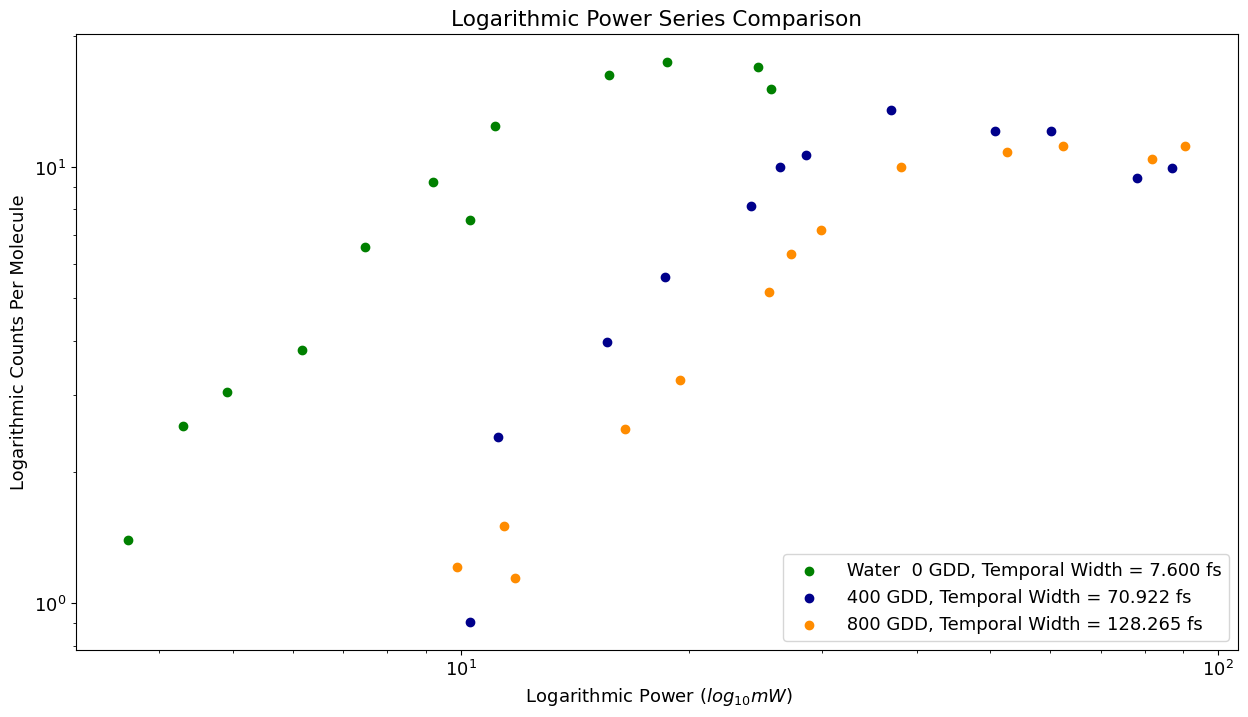

In [47]:






plt.figure(figsize=(15,8))
plt.xscale('log')
plt.yscale('log')
plt.scatter(power_water, cpm_water, color ='green', label = ' Water  0 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_water)))

plt.scatter(power_400, cpm_400, color ='darkblue', label = ' 400 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_400)))
plt.scatter(power_800, cpm_800, color ='darkorange', label = ' 800 GDD, Temporal Width = {0:.3f} fs'.format(np.mean(temporal_width_800)))
#plt.plot(log_power_400, np.log10(power_400**2)-2,color ='magenta', label = 'power square dependence')
plt.xlabel(" Logarithmic Power ($log_{10} mW$)")
plt.ylabel("Logarithmic Counts Per Molecule")
plt.title("Logarithmic Power Series Comparison")
title = 'log_power_series_comp'+(date.today()).strftime("_%d_%m_%y")+'.png'
save_folder =os.path.join(save_folder,title)
plt.legend()
#plt.savefig(save_folder)
plt.show()